**ESTE ARCHIVO ES PARA EXPANDIR LA INFORMACION QUE PODEMOS OBTENER SOBRE EL DF HACIENDO MAS GRAFICOS QUE QUIZAS ESTEN PIOLAS. AGREGUEN IDEAS CON # PARA CREAR SECCION**

# Cosas necesarias del principio

In [1]:
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importo librerias y tabla ya limpia, haciendo la copia

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import missingno as msno

clean_tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/clean_tabla.csv', index_col=0)
tabla_provincias = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Provincia.csv', index_col=0)
df_provincias = tabla_provincias.copy()
df = clean_tabla_df.copy()
df = df[df['nivel_id'] == 3]
df

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,escuela_id,sexo,indice_socioeconomico,nivel_desemp_matematica,nivel_desemp_lengua,nivel_desemp_ciencias_sociales,nivel_desemp_ciencias_naturales,tiene_notebook,tiene_pc,tiene_tablet,tiene_celular,tiene_smartphone,tiene_consola,tiene_smarttv,tiene_cable,repeticion_primaria,repeticion_secundaria,nivel_id,year_id,ambito,gestion,icse,icse_cat,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,tecnica,tiene_internet,subvencion,dependencia,tasa_con_nbi,mate_nc_na,lengua_nc_na,sociales_nc_na,naturales_nc_na,Mate_avanzado,Mate_satisfactorio,Mate_Basico,Mate_Bajo_Basico,lengua_avanzado,lengua_satisfactorio,lengua_Basico,lengua_Bajo_Basico,sociales_avanzado,sociales_satisfactorio,sociales_Basico,sociales_Bajo_Basico,naturales_avanzado,naturales_satisfactorio,naturales_Basico,naturales_Bajo_Basico,departamento_id,provincia_id
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1037297.0,1037567817,NaN,1.0,por_debajo_del_basico,basico,basico,satisfactorio,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,NaN,NaN,3,2016,0,0,0.303,0.0,1.938272,1.0,1,1.0,2.0,0.0,0.104660,0,0,0,0,0.000000,0.000000,0.000000,1.462675,0.000000,0.000000,1.55202,0.000000,0.000000,0.000000,1.467148,0.0,0.000000,1.570519,0.0,0.000000,0.0,0.0
1014085.0,1037567817,NaN,1.0,basico,por_debajo_del_basico,basico,satisfactorio,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,NaN,NaN,3,2016,0,0,0.303,0.0,1.938272,1.0,1,1.0,2.0,0.0,0.104660,0,0,0,0,0.000000,0.000000,1.462675,0.000000,0.000000,0.000000,0.00000,1.552020,0.000000,0.000000,1.467148,0.0,0.000000,1.570519,0.0,0.000000,0.0,0.0
67702.0,2004740133,NaN,NaN,por_debajo_del_basico,por_debajo_del_basico,satisfactorio,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2013,0,0,0.111,0.0,1.857143,1.0,0,1.0,2.0,0.0,0.104660,0,0,0,0,0.000000,0.000000,0.000000,1.877512,0.000000,0.000000,0.00000,1.764489,0.000000,1.811274,0.000000,0.0,0.000000,0.000000,0.0,1.922962,0.0,0.0
1130145.0,1037567817,NaN,1.0,avanzado,avanzado,avanzado,avanzado,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,3,2016,0,0,0.303,0.0,1.938272,1.0,1,1.0,2.0,0.0,0.104660,0,0,0,0,1.644481,0.000000,0.000000,0.000000,2.541745,0.000000,0.00000,0.000000,1.647044,0.000000,0.000000,0.0,2.571266,0.000000,0.0,0.000000,0.0,0.0
218677.0,1548760025,NaN,NaN,por_debajo_del_basico,por_debajo_del_basico,basico,por_debajo_del_basico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2013,0,1,-1.000,NaN,2.377778,2.0,0,1.0,1.0,0.0,0.104660,0,0,0,0,0.000000,0.000000,0.000000,1.468137,0.000000,0.000000,0.00000,1.413734,0.000000,0.000000,1.434590,0.0,0.000000,0.000000,0.0,1.500215,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122927.0,21604334424,NaN,1.0,satisfactorio,satisfactorio,satisfactorio,satisfactorio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3,2016,0,1,-1.000,NaN,2.743590,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,0.000000,1.104980,0.000000,0.000000,0.000000,1.017749,0.00000,0.000000,0.000000,1.005995,0.000000,0.0,0.000000,1.013172,0.0,0.000000,250.0,23.0
111435.0,25204992428,NaN,NaN,satisfactorio,avanzado,basico,satisfactorio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2013,0,1,-1.000,NaN,2.801980,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,0.000000,1.267878,0.000000,0.000000,1.255464,0.000000,0.00000,0.000000,0.000000,0.000000,1.291033,0.0,0.000000,1.353793,0.0,0.000000,250.0,23.0
973858.0,25204992428,NaN,2.0,avanzado,satisfactorio,avanzado,avanzado,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,3,2016,0,1,-1.000,NaN,2.801980,2.0,0,1.0,1.0,0.0,0.083297,0,0,0,0,1.139511,0.000000,0.000000,0.000000,0.000000,1.049554,0.00000,0.000000,1.037433,0.000000,0.000000,0.0,1.044834,0.000000,0.0,0.000000,250.0,23.0


# Grafico de Datos faltantes

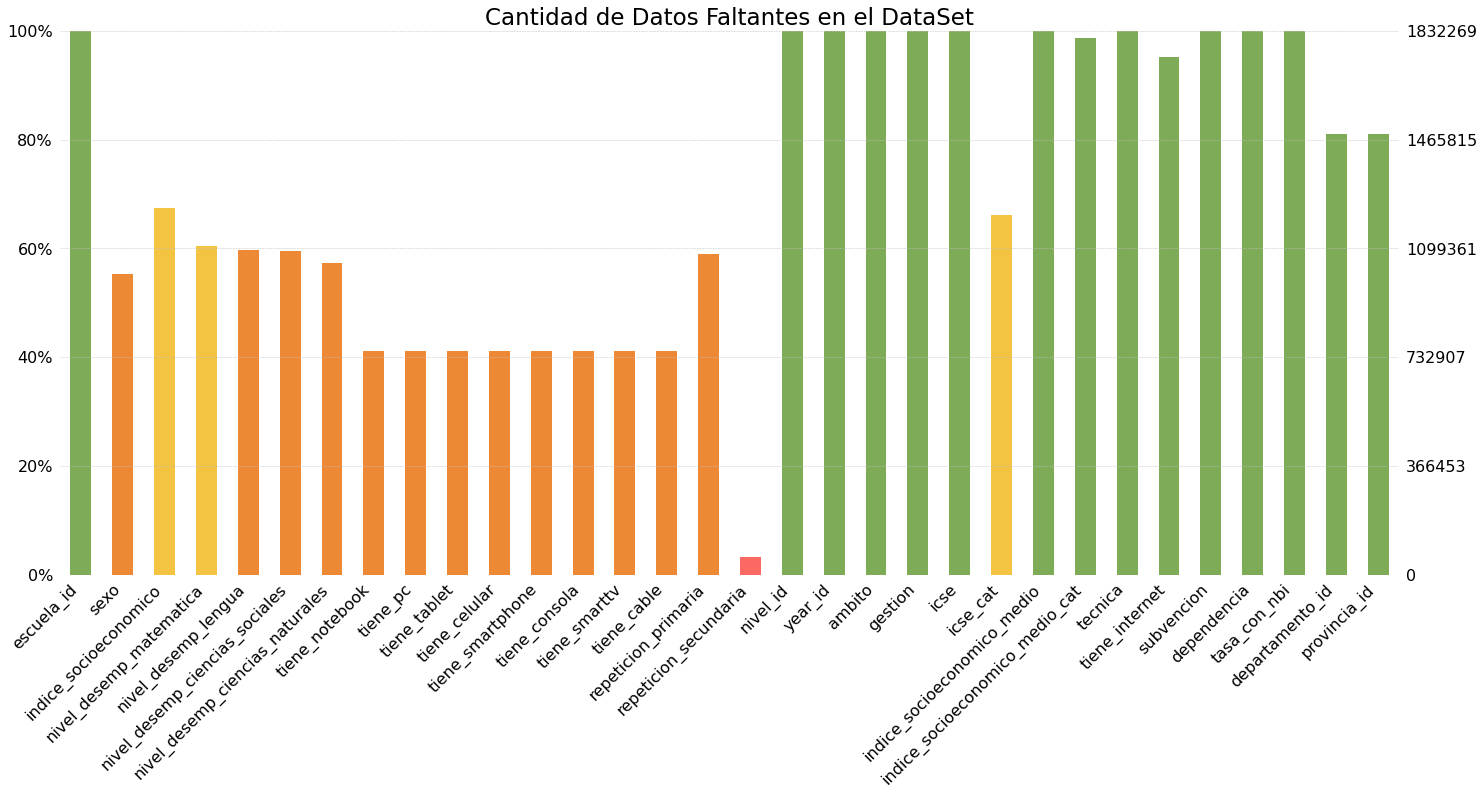

In [3]:
df_datos=clean_tabla_df.drop(['mate_nc_na','lengua_nc_na','sociales_nc_na','naturales_nc_na','Mate_avanzado','Mate_satisfactorio','Mate_Basico','Mate_Bajo_Basico','lengua_avanzado','lengua_satisfactorio','lengua_Basico','lengua_Bajo_Basico','sociales_avanzado','sociales_satisfactorio','sociales_Basico','sociales_Bajo_Basico','naturales_avanzado','naturales_satisfactorio','naturales_Basico','naturales_Bajo_Basico'], axis=1).copy()
msno.bar(df_datos,color=np.repeat(['#7eab55','#ed8934','#f5c342','#ed8934','#fb6962','#7eab55','#f5c342','#7eab55'],repeats=[1,1,2,12,1,5,1,9]))
plt.hlines(np.arange(0,1.2,0.2),xmin=-50,xmax=50,linestyles='dashed',colors='#c0c0c0',linewidth=0.5)
plt.title("Cantidad de Datos Faltantes en el DataSet", fontsize=23)
plt.yticks(ticks=np.arange(1,-0.2,-0.2),labels=["100%","80%","60%","40%","20%","0%"])
plt.ylabel("Porcentaje de Datos")
plt.tick_params(axis='x',which='both',top=False,labeltop=False)

casi no hay datos de repeticion secundaria!

# Stacked Barplots comparando variables categoricas que utilizamos en los modelos

### Índice Socioeconómico

In [4]:
#creo los dfs filtrados
df_ise0=df.loc[df.indice_socioeconomico==0].copy()
df_ise1=df.loc[df.indice_socioeconomico==1].copy()
df_ise2=df.loc[df.indice_socioeconomico==2].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum(),df_ise2['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum(),df_ise2['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum(),df_ise2['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum(),df_ise2['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum(),df_ise2['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
alto=[nc_na[2],bajo_basico[2],basico[2],satisfactorio[2],avanzado[2]]
# creo el df
plotdata = pd.DataFrame()
plotdata['Bajo'] = bajo
plotdata['Medio'] = medio
plotdata['Alto'] = alto
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

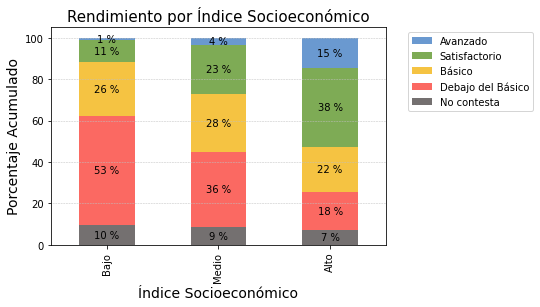

In [5]:
#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Índice Socioeconómico', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Índice Socioeconómico',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#c0c0c0',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

In [6]:
labels

['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']

### Smartphone

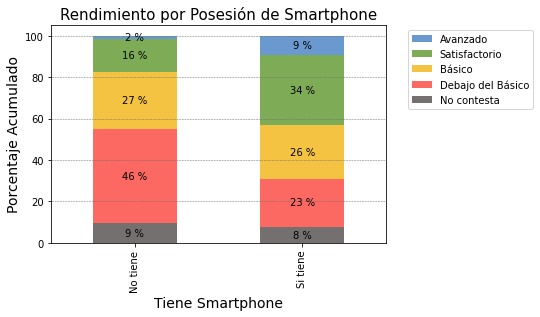

In [7]:
#creo los dfs filtrados
df_ise0=df.loc[df.tiene_smartphone==0].copy()
df_ise1=df.loc[df.tiene_smartphone==1].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['No tiene'] = bajo
plotdata['Si tiene'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Posesión de Smartphone', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Tiene Smartphone',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### Internet

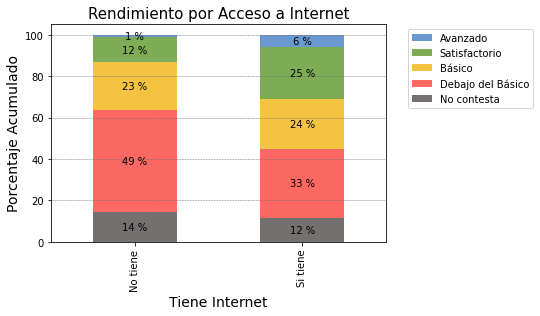

In [8]:
#creo los dfs filtrados
df_ise0=df.loc[df.tiene_internet==0].copy()
df_ise1=df.loc[df.tiene_internet==1].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['No tiene'] = bajo
plotdata['Si tiene'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Acceso a Internet', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Tiene Internet',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

In [9]:
plotdata3

,0,1,2,3,4
No tiene,14.347150,49.269979,23.251520,11.792498,1.338854
Si tiene,11.681681,33.256826,23.928306,25.039597,6.093590


### Índice Socioeconómico de la Escuela

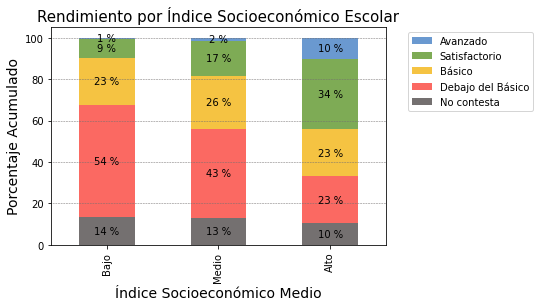

In [10]:
#creo los dfs filtrados
df_ise0=df.loc[df.indice_socioeconomico_medio_cat==0].copy()
df_ise1=df.loc[df.indice_socioeconomico_medio_cat==1].copy()
df_ise2=df.loc[df.indice_socioeconomico_medio_cat==2].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum(),df_ise2['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum(),df_ise2['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum(),df_ise2['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum(),df_ise2['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum(),df_ise2['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
alto=[nc_na[2],bajo_basico[2],basico[2],satisfactorio[2],avanzado[2]]
# creo el df
plotdata = pd.DataFrame()
plotdata['Bajo'] = bajo
plotdata['Medio'] = medio
plotdata['Alto'] = alto
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Índice Socioeconómico Escolar', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Índice Socioeconómico Medio',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### Computadora (notebook o PC)

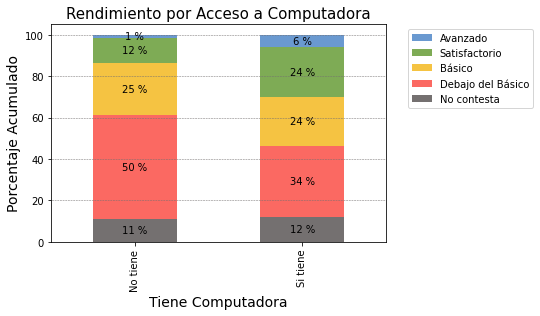

In [11]:
#creo la variable compu
def g(row):
  if (row['tiene_notebook'] !=0) | (row["tiene_pc"] !=0):
    val = 1 # 1 significa que tiene compu en casa
  else:
    val = 0
  return val
df_compu = df.copy()
df_compu['tiene_compu'] = df_compu.apply(g,axis=1)

#creo los dfs filtrados
df_ise0=df_compu.loc[df_compu.tiene_compu==0].copy()
df_ise1=df_compu.loc[df_compu.tiene_compu==1].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['No tiene'] = bajo
plotdata['Si tiene'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Acceso a Computadora', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Tiene Computadora',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### ICSE Categorico

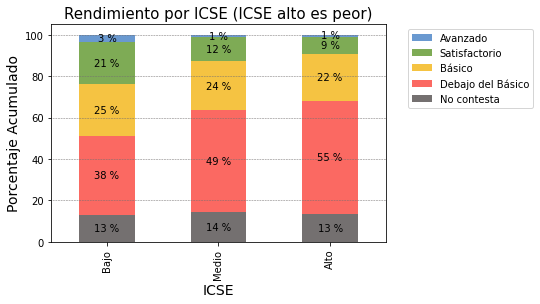

In [12]:
#creo los dfs filtrados
df_ise0=df.loc[df.icse_cat==0].copy()
df_ise1=df.loc[df.icse_cat==1].copy()
df_ise2=df.loc[df.icse_cat==2].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum(),df_ise2['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum(),df_ise2['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum(),df_ise2['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum(),df_ise2['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum(),df_ise2['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
alto=[nc_na[2],bajo_basico[2],basico[2],satisfactorio[2],avanzado[2]]
# creo el df
plotdata = pd.DataFrame()
plotdata['Bajo'] = bajo
plotdata['Medio'] = medio
plotdata['Alto'] = alto
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por ICSE (ICSE alto es peor)', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('ICSE',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### Gestion

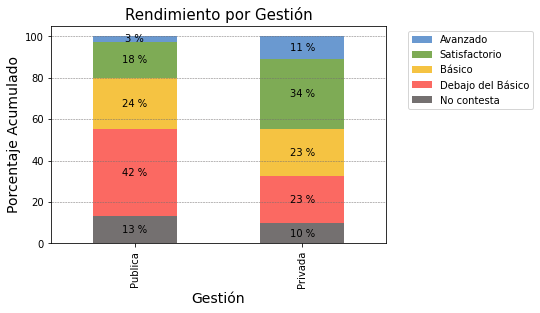

In [13]:
#creo los dfs filtrados
df_ise0=df.loc[df.gestion==0].copy()
df_ise1=df.loc[df.gestion==1].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['Publica'] = bajo
plotdata['Privada'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Gestión', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Gestión',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### Consola

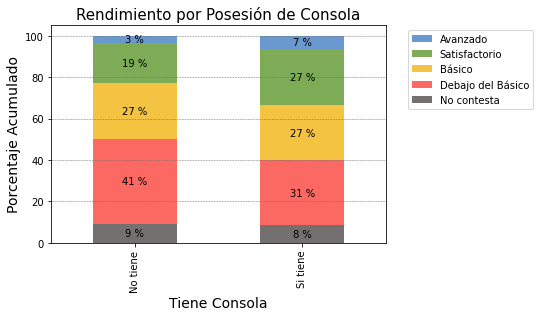

In [14]:
#creo los dfs filtrados
df_ise0=df.loc[df.tiene_consola==0].copy()
df_ise1=df.loc[df.tiene_consola==1].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['No tiene'] = bajo
plotdata['Si tiene'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Posesión de Consola', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Tiene Consola',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### Smart-TV

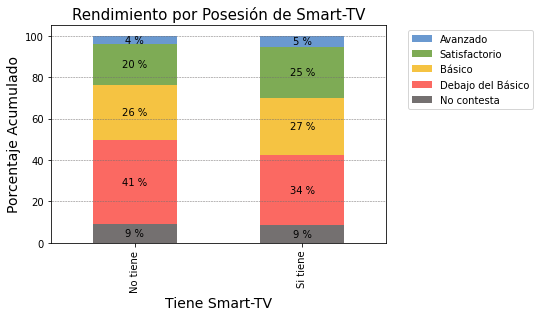

In [15]:
#creo los dfs filtrados
df_ise0=df.loc[df.tiene_smarttv==0].copy()
df_ise1=df.loc[df.tiene_smarttv==1].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['No tiene'] = bajo
plotdata['Si tiene'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento por Posesión de Smart-TV', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('Tiene Smart-TV',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

### Repeticion Primaria

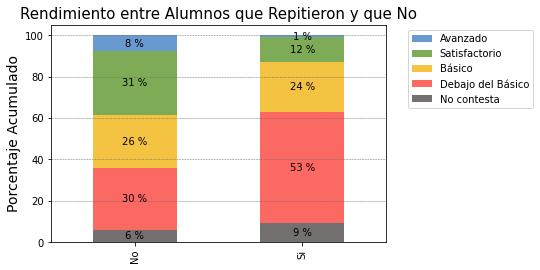

In [16]:
#creo los dfs filtrados
df_ise0=df.loc[df.repeticion_primaria==0].copy()
df_ise1=df.loc[(df.repeticion_primaria==1)|(df.repeticion_primaria==2)|(df.repeticion_primaria==3)].copy()
#hago las columnas de las barras
nc_na=[df_ise0['mate_nc_na'].sum(),df_ise1['mate_nc_na'].sum()]
bajo_basico=[df_ise0['Mate_Bajo_Basico'].sum(),df_ise1['Mate_Bajo_Basico'].sum()]
basico=[df_ise0['Mate_Basico'].sum(),df_ise1['Mate_Basico'].sum()]
satisfactorio=[df_ise0['Mate_satisfactorio'].sum(),df_ise1['Mate_satisfactorio'].sum()]
avanzado=[df_ise0['Mate_avanzado'].sum(),df_ise1['Mate_avanzado'].sum()]
#hago las listas de distintos niveles socioeconomicos
bajo=[nc_na[0],bajo_basico[0],basico[0],satisfactorio[0],avanzado[0]]
medio=[nc_na[1],bajo_basico[1],basico[1],satisfactorio[1],avanzado[1]]
# creo el df
plotdata = pd.DataFrame()
plotdata['No'] = bajo
plotdata['Si'] = medio
#modifico un poco
plotdata2 = plotdata.transpose()
plotdata3 = plotdata2.div(plotdata2.sum(axis=1), axis=0)*100

#grafico
ax = plotdata3.plot(kind='bar', stacked=True, color=['#747070','#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['No contesta', 'Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.title('Rendimiento entre Alumnos que Repitieron y que No', fontsize=15)
plt.ylabel('Porcentaje Acumulado', size=14)
plt.xlabel('',size=14)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.0f} %'.format(height), horizontalalignment='center', verticalalignment='center')  


plt.show()

In [17]:
df.repeticion_primaria.value_counts()

0.0    55862
1.0     2929
2.0      397
3.0      233
Name: repeticion_primaria, dtype: int64

# Violin Plots

### Índice Socioeconómico Medio

([<matplotlib.axis.YTick at 0x7f89a48ae4e0>,
 [Text(0, 0, 'Debajo del Básico'),
  Text(0, 0, 'Básico'),
  Text(0, 0, 'Satisfactorio'),
  Text(0, 0, 'Avanzado')])

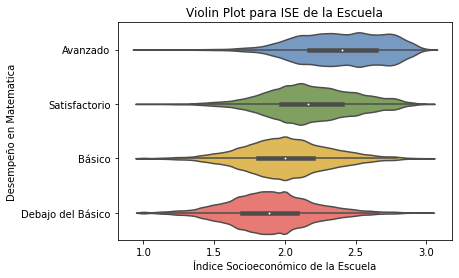

In [18]:
df_violin1=df[df["indice_socioeconomico_medio"]!=-1]
sn.violinplot( y=df_violin1["nivel_desemp_matematica"], x=df_violin1["indice_socioeconomico_medio"], order=['avanzado','satisfactorio','basico','por_debajo_del_basico'],palette=['#6a99d0','#7eab55','#f5c342','#fb6962'])
plt.xlabel("Índice Socioeconómico de la Escuela")
plt.ylabel("Desempeño en Matematica")
plt.title("Violin Plot para ISE de la Escuela")
plt.yticks(np.arange(3,-1,step=-1),["Debajo del Básico","Básico","Satisfactorio","Avanzado"])

### ICSE

([<matplotlib.axis.YTick at 0x7f899befbc18>,
 [Text(0, 0, 'Debajo del Básico'),
  Text(0, 0, 'Básico'),
  Text(0, 0, 'Satisfactorio'),
  Text(0, 0, 'Avanzado')])

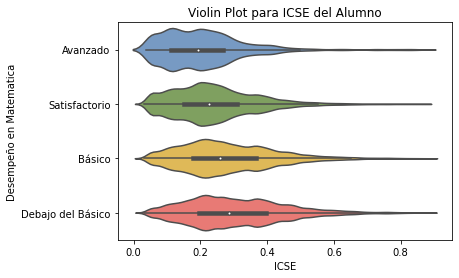

In [19]:
df_violin2=df[df["icse"]!=-1]
sn.violinplot( y=df_violin2["nivel_desemp_matematica"], x=df_violin2["icse"], order=['avanzado','satisfactorio','basico','por_debajo_del_basico'],palette=['#6a99d0','#7eab55','#f5c342','#fb6962'])
plt.xlabel("ICSE")
plt.ylabel("Desempeño en Matematica")
plt.title("Violin Plot para ICSE del Alumno")
plt.yticks(np.arange(3,-1,step=-1),["Debajo del Básico","Básico","Satisfactorio","Avanzado"])

# PiePlot Bruno Internet Nivel Pais

Text(0.5, 1.0, 'Acceso a Internet: Nivel País')

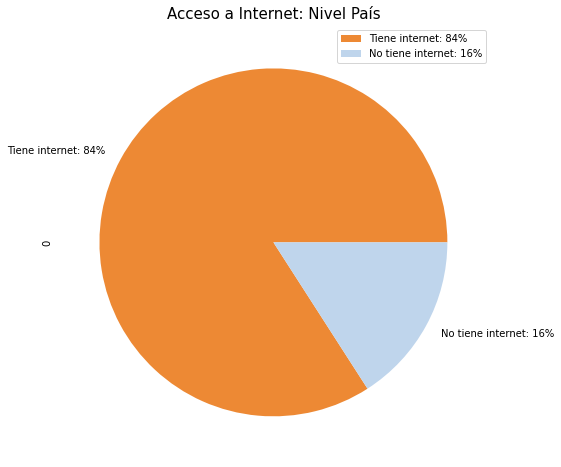

In [20]:
tiene = 1468141
no_tiene = 277643
total = tiene + no_tiene
df_bruno = pd.DataFrame([tiene,no_tiene], index=['Tiene internet: ' + str(int(round(tiene/(tiene+no_tiene)*100,0))) + '%' ,'No tiene internet: ' + str(int(round(no_tiene/(tiene+no_tiene)*100,0))) + '%'])
df_bruno.plot(kind='pie', subplots=True, figsize=(8, 8), colors = ['#ED8934','#BFD5EC'])
plt.title("Acceso a Internet: Nivel País", fontsize = 15)

# Provincias

### Internet

In [21]:
df_internet_prov = df[['tiene_internet','provincia_id']].copy()
df_internet_prov = df_internet_prov.dropna()

Text(0.5, 0, '')

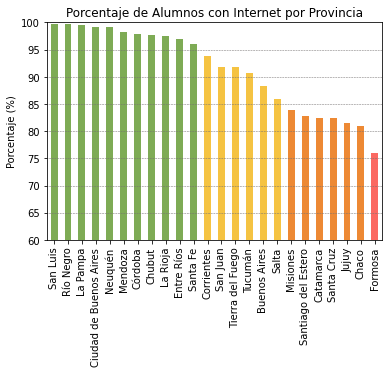

In [22]:
df_prov_int = df_provincias.copy()
df_prov_int['internet']=0

for i in np.arange(0,24):
    total = len(df_internet_prov[df_internet_prov['provincia_id']==i].index)
    suma = (df_internet_prov[df_internet_prov['provincia_id']==i].sum()).tiene_internet
    df_prov_int.loc[df_prov_int['id'] == i,'internet'] =(suma/total)*100

df_prov_int.sort_values(by="internet",axis=0, ascending=False).plot.bar(x='name',y="internet", title="Porcentaje de Alumnos con Internet por Provincia", legend=None,color=np.repeat(['#7eab55','#f5c342','#ed8934','#fb6962'],repeats=[11,6,6,1]))
plt.ylim(bottom=60, top=100)
plt.hlines(np.arange(60,100,5),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)
plt.ylabel("Porcentaje (%)")
plt.xlabel("")

### Tecnologia (Smartphone, PC o Laptop)

In [23]:
df_tecnologia = df.copy()

def g(row):
  if (row['tiene_notebook'] !=0) | (row["tiene_pc"] !=0) | (row["tiene_smartphone"] !=0):
    val = 1 # 1 significa que tiene compu en casa
  else:
    val = 0
  return val
df_tecnologia["tiene_tecnologia"] = df_tecnologia.apply(g,axis=1)

df_tecnologia = df_tecnologia[['tiene_tecnologia','provincia_id']]
df_tecnologia = df_tecnologia.dropna()

df_tecnologia_prov = df_provincias.copy()
df_tecnologia_prov['tecnologia']=0

for i in np.arange(0,24):
    total = len(df_tecnologia[df_tecnologia['provincia_id']==i].index)
    suma = (df_tecnologia[df_tecnologia['provincia_id']==i].sum()).tiene_tecnologia
    df_tecnologia_prov.loc[df_tecnologia_prov['id'] == i,'tecnologia'] =(suma/total)*100

Text(0.5, 0, '')

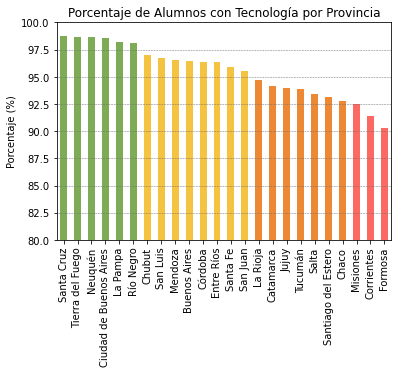

In [24]:
df_tecnologia_prov.sort_values(by="tecnologia",axis=0, ascending=False).plot.bar(x='name',y="tecnologia", title="Porcentaje de Alumnos con Tecnología por Provincia", legend=None,color=np.repeat(['#7eab55','#f5c342','#ed8934','#fb6962'],repeats=[6,8,7,3]))
plt.ylim(bottom=80, top=100)
plt.hlines(np.arange(80,100,2.5),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)
plt.ylabel("Porcentaje (%)")
plt.xlabel("")

### Smartphones

In [25]:
df_smartphone_prov = df[['tiene_smartphone','provincia_id']].copy()
df_smartphone_prov = df_smartphone_prov.dropna()

Text(0.5, 0, '')

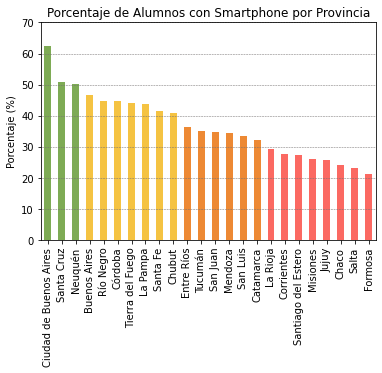

In [26]:
df_prov_sma = df_provincias.copy()
df_prov_sma['smartphone']=0

for i in np.arange(0,24):
    total = len(df_smartphone_prov[df_smartphone_prov['provincia_id']==i].index)
    suma = (df_smartphone_prov[df_smartphone_prov['provincia_id']==i].sum()).tiene_smartphone
    df_prov_sma.loc[df_prov_sma['id'] == i,'smartphone'] =(suma/total)*100

df_prov_sma.sort_values(by="smartphone",axis=0, ascending=False).plot.bar(x='name',y="smartphone", title="Porcentaje de Alumnos con Smartphone por Provincia", legend=None,color=np.repeat(['#7eab55','#f5c342','#ed8934','#fb6962'],repeats=[3,7,6,8]))
plt.ylim(bottom=0, top=70)
plt.hlines(np.arange(0,80,10),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)
plt.ylabel("Porcentaje (%)")
plt.xlabel("")

### Linea: %avanzados, %smartphone

In [27]:
#AVANZADOS
df_avanzado_prov = df[['Mate_avanzado','provincia_id']].copy()
df_avanzado_prov = df_avanzado_prov.dropna()

df_prov_ava = df_provincias.copy()
df_prov_ava['avanzado']=0

for i in np.arange(0,24):
    total = len(df_avanzado_prov[df_avanzado_prov['provincia_id']==i].index)
    suma = (df_avanzado_prov[df_avanzado_prov['provincia_id']==i].sum()).Mate_avanzado
    df_prov_ava.loc[df_prov_ava['id'] == i,'avanzado'] =(suma/total)*100
# BAJO BASICO
df_bajo_basico_prov = df[['Mate_Bajo_Basico','provincia_id']].copy()
df_bajo_basico_prov = df_bajo_basico_prov.dropna()

df_prov_baba = df_provincias.copy()
df_prov_baba['bajo_basico']=0

for i in np.arange(0,24):
    total = len(df_bajo_basico_prov[df_bajo_basico_prov['provincia_id']==i].index)
    suma = (df_bajo_basico_prov[df_bajo_basico_prov['provincia_id']==i].sum()).Mate_Bajo_Basico
    df_prov_baba.loc[df_prov_baba['id'] == i,'bajo_basico'] =(suma/total)*100




In [28]:
#MERGE DE LOS 3 DFS
df_prov_merge1 = df_prov_sma.merge(df_prov_ava)
df_prov_merge2 = df_prov_merge1.merge(df_prov_baba)
df_prov_merge2

,id,name,smartphone,avanzado,bajo_basico
0,0,Buenos Aires,46.789210,9.514350,52.549612
1,1,Catamarca,32.177033,2.127658,64.957990
2,2,Chaco,24.074074,1.410520,78.970881
3,3,Chubut,40.877668,6.445261,59.271772
4,4,Ciudad de Buenos Aires,62.476672,20.605225,34.958887
5,5,Corrientes,27.687534,1.926390,71.671264
6,6,Córdoba,44.681322,9.445244,37.562534
7,7,Entre Ríos,36.220169,5.332130,43.909397
8,8,Formosa,21.173523,1.783791,73.026009
9,9,Jujuy,25.687023,2.939390,58.163164


Text(0, 0.5, 'Porcentaje de Rendimiento Avanzado (%)')

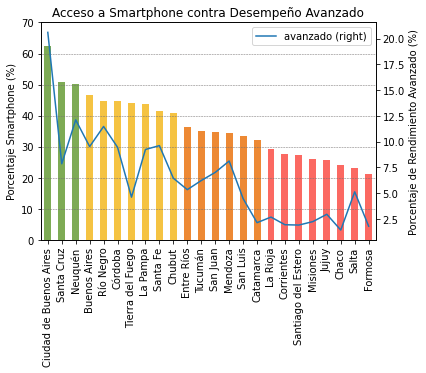

In [29]:
#GRAFICO DE BARRAS PARA SMARTPHONE Y 2 LINEAS
df_prov_merge2 = df_prov_merge2.sort_values(by="smartphone",axis=0, ascending=False)
#Smartphone: barplot
ax = df_prov_merge2.plot.bar(x='name',y="smartphone", title="Acceso a Smartphone contra Desempeño Avanzado", legend=None,color=np.repeat(['#7eab55','#f5c342','#ed8934','#fb6962'],repeats=[3,7,6,8]))
plt.ylim(bottom=0, top=70)
plt.ylabel("Porcentaje Smartphone (%)")
plt.hlines(np.arange(0,80,10),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)
plt.xlabel("")
#Avanzados
ax2 = df_prov_merge2.plot(x='name', y='avanzado', linestyle='-',ax=ax,secondary_y=True,xlabel="")
ax.xaxis.set_tick_params(rotation=90)
ax2.set_ylabel("Porcentaje de Rendimiento Avanzado (%)")

### Rendimiento (grafico Nacho)

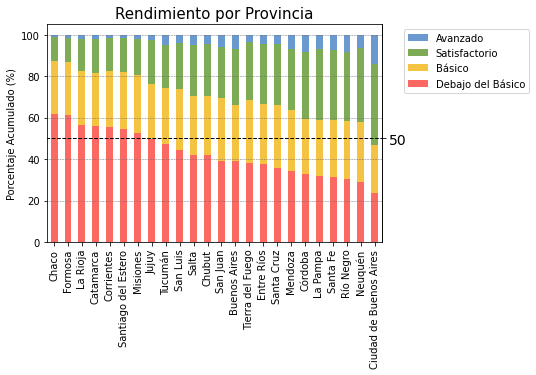

In [30]:
df_1 = df[df['mate_nc_na']==0].copy()
df_nacho = df_provincias.copy()
# columna avanzado
df_nacho['avanzado']=0
df_nacho['satisfactorio']=0
df_nacho['basico']=0
df_nacho['bajo_basico']=0

for i in np.arange(24):
  suma1 = df_1[df_1['provincia_id']==i].Mate_avanzado.sum()
  suma2 = df_1[df_1['provincia_id']==i].Mate_satisfactorio.sum()
  suma3 = df_1[df_1['provincia_id']==i].Mate_Basico.sum()
  suma4 = df_1[df_1['provincia_id']==i].Mate_Bajo_Basico.sum()
  total = suma1 + suma2 + suma3 + suma4
  df_nacho.loc[df_nacho['id']==i,'avanzado'] = (suma1/total)*100
  df_nacho.loc[df_nacho['id']==i,'satisfactorio'] = (suma2/total)*100
  df_nacho.loc[df_nacho['id']==i,'basico'] = (suma3/total)*100
  df_nacho.loc[df_nacho['id']==i,'bajo_basico'] = (suma4/total)*100

df_nacho = df_nacho.sort_values(by="bajo_basico",axis=0, ascending=False)

#STACKED BARPLOT
#grafico
ax = df_nacho[['bajo_basico','basico','satisfactorio','avanzado']].plot(kind='bar', stacked=True, color=['#fb6962','#f5c342','#7eab55','#6a99d0'])

handles, labels = ax.get_legend_handles_labels()
labels=['Debajo del Básico', 'Básico', 'Satisfactorio', 'Avanzado']
# reverse the order
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1.05,1))

plt.xticks(ticks=np.arange(24),labels=df_nacho.name.to_list())
plt.title('Rendimiento por Provincia', fontsize=15)
plt.ylabel('Porcentaje Acumulado (%)', size=10)
plt.hlines(np.arange(0,120,20),xmin=-50,xmax=50,linestyles='dashed',colors='#747070',linewidth=0.5)
plt.hlines(50,xmin=-50,xmax=50,linestyles='dashed',colors='black',linewidth=1)
ax.xaxis.set_tick_params(rotation=90)
secax = ax.secondary_yaxis('right')
secax.set_yticks(ticks=[50])
secax.tick_params(right=True, labelsize = 14)